In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import skimage.data as data
import skimage.feature as feature
import skimage.transform as transform

In [3]:
path_img = 'D:\\Data\\AnimalsOnTheWeb\\'

In [4]:
lbp_df = pd.DataFrame()

In [5]:
list_folder = os.listdir(path_img)
list_folder = [f for f in list_folder if not 'other' in f]
foldername = list_folder[1]

In [6]:
list_files = os.listdir(path_img+foldername+'\\')
list_files = [f for f in list_files if 'pic' in f]
filename = list_files[0]

In [7]:
img_arr = data.load(path_img + foldername+'\\'+filename,as_grey=True)
lbp = feature.local_binary_pattern(img_arr, 8, 2, "uniform")
brickCount = int(lbp.max() + 1)
lbp_hist, _ = np.histogram(lbp, normed = True, bins = brickCount, range = (0, brickCount))

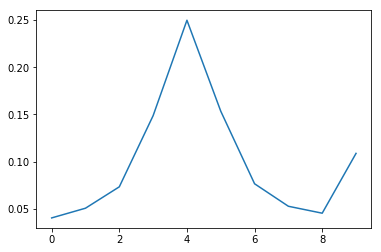

In [8]:
plt.plot(lbp_hist)

In [9]:
lbp_ser = pd.Series([foldername,filename,\
                lbp_hist[0],lbp_hist[1],lbp_hist[2],lbp_hist[3],lbp_hist[4],\
                lbp_hist[5],lbp_hist[6],lbp_hist[7],lbp_hist[8],lbp_hist[9]\
               ],index=['Animal','File','LBP0','LBP1','LBP2','LBP3','LBP4',\
                        'LBP5','LBP6','LBP7','LBP8','LBP9'])

In [10]:
lbp_df.append(lbp_ser,ignore_index=True)

,Animal,File,LBP0,LBP1,LBP2,LBP3,LBP4,LBP5,LBP6,LBP7,LBP8,LBP9
0,ant,pic100_Lniger (9).jpg,0.040441,0.050721,0.073365,0.148711,0.24974,0.153434,0.0766,0.052775,0.045437,0.108776


In [11]:
# HOG
filename = list_files[2]
img_arr = data.load(path_img + foldername+'\\'+filename,as_grey=True)

In [12]:
descs, descs_img = feature.daisy(img_arr, step=1000, radius=58, rings=2, histograms=6,
                         orientations=8, visualize=True)

In [13]:
descs.shape

(1, 1, 104)

In [14]:
descs_img.shape

(661, 504, 3)

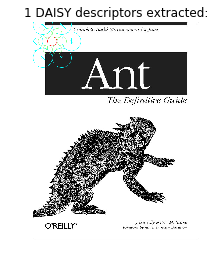

In [15]:
fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(descs_img)
descs_num = descs.shape[0] * descs.shape[1]
ax.set_title('%i DAISY descriptors extracted:' % descs_num)
plt.show()

In [16]:
descs

array([[[0.00046583, 0.00170573, 0.00343055, 0.00164135, 0.00032396,
         0.00021722, 0.00035996, 0.00027973, 0.00034023, 0.00176367,
         0.00367996, 0.00175241, 0.00032998, 0.00023661, 0.00038821,
         0.0002293 , 0.00376363, 0.01880968, 0.03913951, 0.01859742,
         0.00329969, 0.00172207, 0.00278791, 0.00193508, 0.01360603,
         0.01843855, 0.02848146, 0.01401916, 0.00399109, 0.00215384,
         0.00288024, 0.00655711, 0.00082706, 0.00100493, 0.00213716,
         0.00639609, 0.01243671, 0.00593865, 0.0011402 , 0.00053844,
         0.00292401, 0.00146535, 0.00096819, 0.00104476, 0.0021901 ,
         0.00595097, 0.01117813, 0.00615698, 0.00117348, 0.0006098 ,
         0.00091067, 0.0005632 , 0.00109078, 0.00614294, 0.01289962,
         0.0061687 , 0.00798803, 0.01239381, 0.01760372, 0.0095057 ,
         0.00693291, 0.01148015, 0.0132856 , 0.00804118, 0.00504504,
         0.01028059, 0.0184026 , 0.00901071, 0.00237797, 0.00139224,
         0.00186251, 0.0025711 , 0